### Titanic Dataset

Dataset is from Kaggle: Titanic - Machine Learning from Disaster | Kaggle

Ahoy, tThis is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print('hi')

hi


In [44]:
ti = pd.read_csv('train.csv')

In [4]:
ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
ti[ti['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nAge
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62


In [ ]:
#REMOVE THE CABIN COLUMN

In [47]:
#REMOVES null values from age
mean = ti['Age'].mean()

#REPLACES ALL NULL AGES WITH THE MEAN
ti['nAge'] = ti['Age'].fillna(mean) 

#ROUNDS AGES TO ZERO DECIMAL PLACES AND CONVERTS IT TO AN INTEGER AS SOME AGES WERE NOT WHOLE NUMBERS
ti['nAge'] = round(ti['nAge'],0).astype(int)
ti.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nAge
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S,30
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C,35
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,61
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27
108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,38


<Axes: >

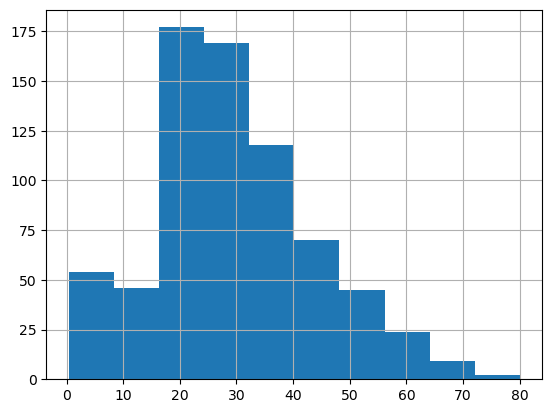

In [48]:
#HISROGRAM WITH ORIGINAL AGES FOR COMPARISON WITH THE NEW AGE DISTRIBUTION
ti['Age'].hist()

In [51]:
#SHOWING CHANGES BETWEEN THE ORIGINAL AGE COLUMN IN THE TABLE TO THE NEW AGE
ti[['Age', 'nAge']]

,Age,nAge
0,22.0,22
1,38.0,38
2,26.0,26
3,35.0,35
4,35.0,35
...,...,...
886,27.0,27
887,19.0,19
888,NaN,30
889,26.0,26


<Axes: >

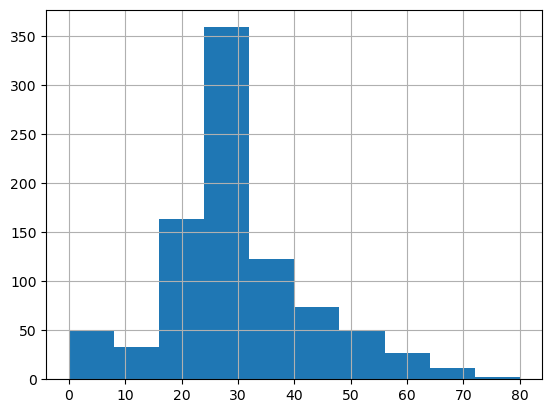

In [50]:
#HISTOGRAM WITH AGES REMOVED
ti['nAge'].hist()

In [98]:
#Separate name into surname, title and name
ti['Surname'] = ti['Name'].str.split(',').str[0] #the number 1 means AFTER the comma, 0 means BEFORE the comma
ti['Forename'] = ti['Name'].str.split('.').str[1]
ti['Title'] = ti['Name'].str.split(',').str[1].str.split('.').str[0]

#ti['Middle'] = ti['Forename'].str.split('(').str[1].str.split(')').str[0]
del ti['Forename']

#we are deleting forename because it will not be required for analysis- we will instead be keeping surname.


ti.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nAge,Surname,Title
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,21,Ryerson,Miss
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q,30,Healy,Miss
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S,42,Jacobsohn,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,30,Laleff,Mr
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S,30,Johannesen-Bratthammer,Mr


In [110]:
#TWO GUESTS DID NOT HAVE AN EMBARKING LOCATION TO FIX THIS, I HAVE REPLACED THEM WITH THE MODE FOR EMBARK LOCATION

ti['nEmbarked'] = ti['Embarked'].fillna(ti['Embarked'].mode())

ti.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nAge,Surname,Title,nEmbarked,AdjustedFare
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C,22,Ringhini,Mr,C,19415.906895
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,17,Andersson,Miss,S,1134.463750
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S,24,Lievens,Mr,S,1359.925000
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,26,Chronopoulos,Mr,C,2069.118730
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C,22,Laroche,Mrs,C,5952.062480


In [123]:
#replace embarked letters with named locations

ti['nEmbarked'] = ti['nEmbarked'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})
ti.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nAge,Surname,Title,nEmbarked,AdjustedFare
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,25,Laroche,Mr,Cherbourg,5952.06
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S,17,Culumovic,Mr,Southampton,1240.04
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S,51,Hogeboom,Mrs,Southampton,11159.73
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,15,McGowan,Miss,Queenstown,1149.38
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,30,Yousseff,Mr,Cherbourg,2069.71


In [144]:
#Survived column rename 1 to survived 0 to deceased

ti['nSurvived'] = ti['Survived'].replace({1: 'Survived', 0: 'Deceased'})
ti.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nAge,Surname,Title,nEmbarked,AdjustedFare,nSurvived
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,31,Davidson,Mr,Southampton,7443.80,Deceased
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,44,Cribb,Mr,Southampton,2304.72,Deceased
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C,51,Williams,Mr,Cherbourg,8786.43,Deceased
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S,21,Hickman,Mr,Southampton,10521.52,Deceased
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S,16,Maioni,Miss,Southampton,12382.48,Survived


In [124]:
#adjusting for inflation if prices were paid in 2024

ti['AdjustedFare'] = round(ti['Fare']* 143.15, 2)

ti.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nAge,Surname,Title,nEmbarked,AdjustedFare
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S,25,Sedgwick,Mr,Southampton,1860.95
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S,27,Moor,Mrs,Southampton,1785.80
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S,2,Hirvonen,Miss,Southampton,1758.96
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S,24,Hamalainen,Mrs,Southampton,2075.68
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,30,Davison,Mrs,Southampton,2304.72


In [122]:
#check males and females
'Value Count:', ti['Sex'].value_counts(), ('Unique Sex:', ti['Sex'].nunique())

('Value Count:',
 Sex
 male      577
 female    314
 Name: count, dtype: int64,
 ('Unique Sex:', 2))

In [140]:
#ti.groupby(ti['Title']).agg({'AdjustedFare':'mean'}).sort_values(by='AdjustedFare', ascending=False)

ti.pivot_table(values = 'AdjustedFare', index = ['Sex','Title'], aggfunc = ['mean', 'min', 'max'])#.sort_values(by='AdjustedFare', ascending=False)


mean          min          max
                      AdjustedFare AdjustedFare AdjustedFare
Sex    Title                                                
female  Dr             3711.760000      3711.76      3711.76
        Lady           5668.740000      5668.74      5668.74
        Miss           6269.665495       966.26     73339.92
        Mlle           8503.415000      7086.53      9920.30
        Mme            9920.300000      9920.30      9920.30
        Mrs            6461.581360      1034.26     35432.60
        Ms             1860.950000      1860.95      1860.95
        the Countess  12382.480000     12382.48     12382.48
male    Capt          10163.650000     10163.65     10163.65
        Col            4441.225000      3800.63      5081.82
        Don            3968.230000      3968.23      3968.23
        Dr             7592.916667      1503.08     19132.00
        Jonkheer          0.000000         0.00         0.00
        Major          4083.355000      3800.63      4366.08
        Master         4967.752500      1219.17     21694.38
        Mr             3498.809110         0.00     73339.92
        Rev            2621.433333      1767.90      4723.95
        Sir            8149.410000      8149.41      8149.41

In [146]:
#pivot table showing payment by gendre and survival
ti.pivot_table(values = 'AdjustedFare', index = ['Sex','nSurvived'], aggfunc = ['mean', 'min', 'max'])#.sort_values(by='AdjustedFare', ascending=False)

mean  min  max
                       nAge nAge nAge
Sex    nSurvived                     
female Deceased   26.074074    2   57
       Survived   29.025751    1   63
male   Deceased   31.237179    1   74
       Survived   27.678899    0   80

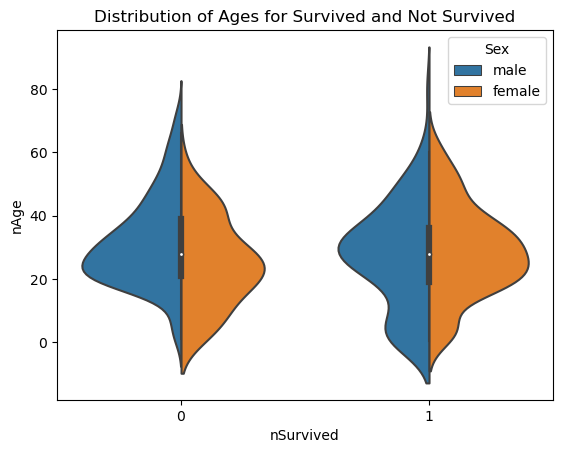

In [157]:
#violin plot showing suvival based on gender. We can see that significantly more young men died than women.
sns.violinplot(data=ti, x='Survived', y='Age', hue='Sex', split=True)
plt.xlabel('nSurvived')
plt.ylabel('nAge')
plt.title('Distribution of Ages for Survived and Not Survived')
plt.show()

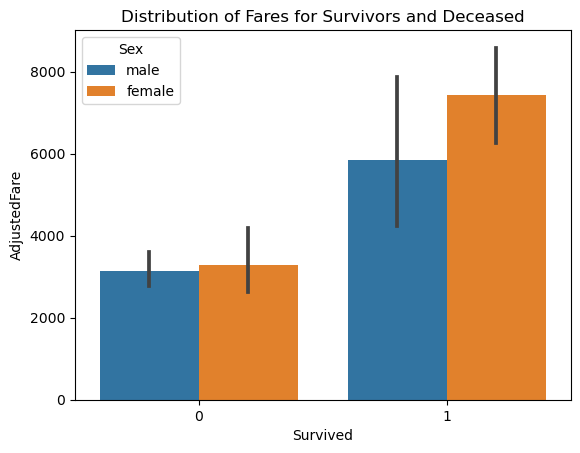

In [158]:
#barplot showing average fare paid by gender
sns.barplot(data=ti, x='Survived', y='AdjustedFare', hue='Sex')
plt.xlabel('Survived')
plt.ylabel('AdjustedFare')
plt.title('Distribution of Fares for Survivors and Deceased')
plt.show()

In [33]:
ti.shape

(891, 13)